# Simulación de Variables Aleatorias Discretas con Soporte Finito
En este notebook se simulan los métodos de aceptación rechazo para simular variables aleatorias Bernoulli y de la función inversa (usando recursión) para la Binomial.

### Simular una v.a. Bernoulli

**Pseudo-Código para simular una v.a. Bernoulli**

Dada $p \in [0,1]$, nos interesa simular un valor para $X \sim Ber(p)$.
1. Simulamos $U \sim U(0,1)$.
2. Si $U < p$, entonces $X=1$. En caso contrario, $X=0$

In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
p = 0.3
u = random.random()
if u < p:
    x = 1
else:
    x = 0
print(x)

1


A continuación hacemos una función para simular una muestra y visualizamos el histograma.

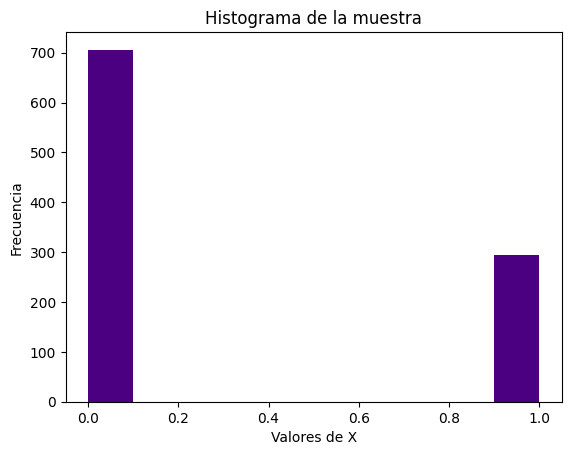

In [10]:
def bernoulli(p, n):
    x = []
    for i in range(n):
        u = random.random()
        if u < p:
            x.append(1)
        else:
            x.append(0)
    return x

muestra = bernoulli(0.3, 1000)
plt.hist(muestra, color='indigo')
plt.title('Histograma de la muestra')
plt.xlabel('Valores de X')
plt.ylabel('Frecuencia')
plt.show()

Como es de esperarse, en aproximadamente en un 30% de elementos de la muestra tuvimos 1 y en el 70% 0.

### Simular v.a. discretas con soporte finito

**Pseudo-Código para simular una v.a. discreta con soporte finito**

Supongamos que $X$ es una variable aleatoria con soporte $\{x_1, x_2, ...,x_k\}$ y tal que su función de masa es $p_X(x_i) = p_i$ donde $p_1, p_2, ..., p_k \in [0,1]$ son probabilidades tales que $\sum_{j=i}^{k}p_j = 1$. Nuestro objetivo es simular un valor para $X$.

1. Generamos $U \sim U(0,1)$.
2. Definimos a $X$ como sigue:
$$
X:=\left\{\begin{array}{l}
x_k \quad \text { si } \sum_{m=0}^{k-1} p_m \leq U<\sum_{m=0}^k p_m \quad \forall k \in\{1, \cdots, n\} \\
0 \quad \text { en otro caso }
\end{array}\right.
$$


In [11]:
def simular_discretas(x, p):
  # Guardamos en un df los datos
  df = pd.DataFrame({'x': x, 'p': p})
  # La suma acumulada y la uniforme
  df['p_acum'] = df['p'].cumsum()
  u = random.random()

  for i in range(len(df)):
      if u <= df['p_acum'][i]: # La condición
          return df['x'][i]
  return np.random.choice(x, p=p)


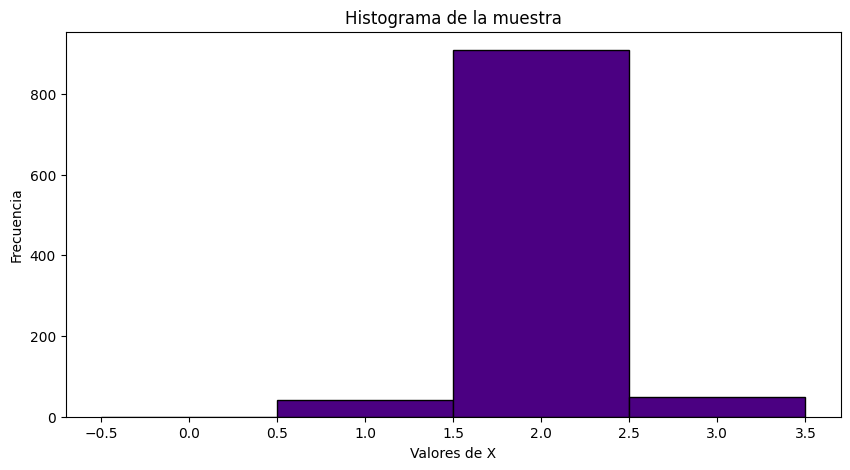

In [37]:
equis = [1,2,3]
probas = [0.05, 0.9, 0.05]
X = [simular_discretas(equis, probas) for i in range(1000)]

plt.figure(figsize=(10,5))
plt.hist(X, color = 'indigo', bins=range(5),edgecolor = 'black', align = 'left', rwidth=1)
plt.title('Histograma de la muestra')
plt.xlabel('Valores de X')
plt.ylabel('Frecuencia')
plt.show()

Con esto en mente, podemos simular variables aleatorias como la Poisson y Binomial

### Simulación de v.a. Binomial

**Pseudo-Código para simular una v.a. Binomial**

Sean $n \in \mathbb{N}$ y $p \in [0,1]$ los parámetros. Usando lo que vimos antes, definiendo una función auxiliar para obtener la función de masa y aplicar la función $\texttt{simular_discretas}$

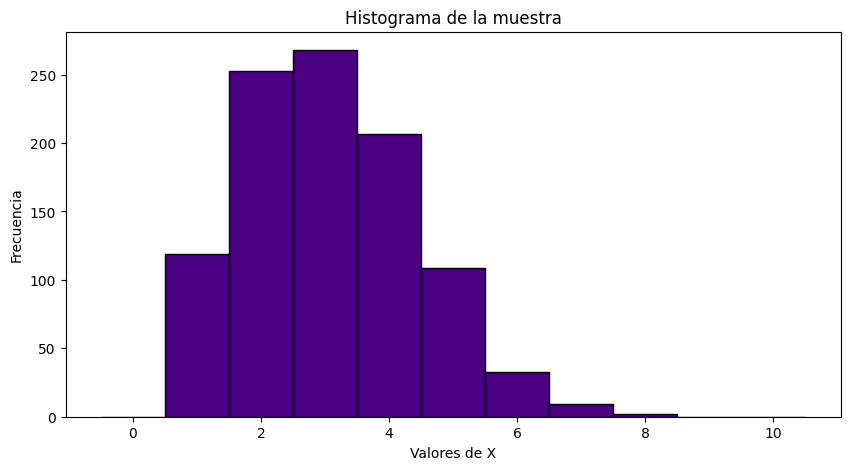

In [28]:
import math
def masa_binomial(n, p, j):
  # Devuelve P(Bin(n,p)=j)
  return (math.comb(n, j))*(p**j)*((1-p)**(n-j))

# Los parámetros de la Binomial
n = 10
p = 0.3
soporte_binomial = range(1, 11)
proba_binomial = [masa_binomial(n, p, j) for j in soporte_binomial]

# Normalizamos para asegurar suma 1, puede haber errores numéricos de redondeo
suma = sum(proba_binomial)
proba_binomial = [q/suma for q in proba_binomial]

# Simulamos la v.a.
Binomial = [simular_discretas(soporte_binomial, proba_binomial) for i in range(1000)]

# Graficamos la v.a.
plt.figure(figsize=(10,5))
plt.hist(Binomial, bins=range(n+2), align='left', rwidth=1, edgecolor='black', color = 'indigo')
plt.title('Histograma de la muestra')
plt.xlabel('Valores de X')
plt.ylabel('Frecuencia')
plt.show()

Definiremos una clase para las variables aleatorias binomiales.

In [39]:
class Binomial:

  def __init__(self, n, p):
    self.n = n
    self.p = p
    # Calculamos la binomial como antes
    self.soporte_binomial = range(1, n+1)
    self.proba_binomial = [masa_binomial(n, p, j) for j in self.soporte_binomial]
    suma = sum(self.proba_binomial)
    self.proba_binomial = [q/suma for q in self.proba_binomial] # Normalizamos por errores numéricos

  def simular(self):
    return simular_discretas(self.soporte_binomial, self.proba_binomial)

  def graficar(self, N=1000):
    # Visualizamos el histograma
    Binom = [self.simular() for i in range(N)]
    plt.figure(figsize=(10,5))
    plt.hist(Binom, bins=range(n+2), align='left', rwidth=1, edgecolor='black', color = 'indigo')
    plt.title(f'Histograma de una muestra binomial de {N} elementos')
    plt.xlabel('Valores de X')
    plt.ylabel('Frecuencia')
    plt.show

  def masa(self, j):
    return masa_binomial(n, p, j)

  def __str__(self):
    return f'Binomial({n, p})'

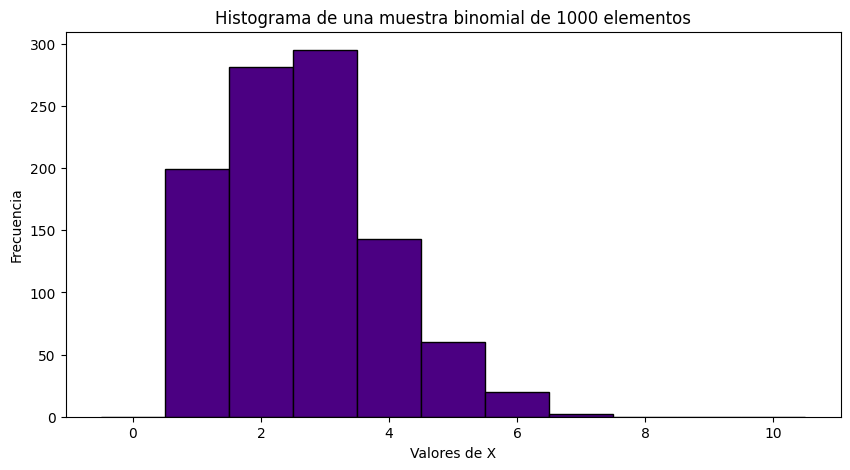

In [42]:
Y = Binomial(10, 0.25)
Y.graficar()

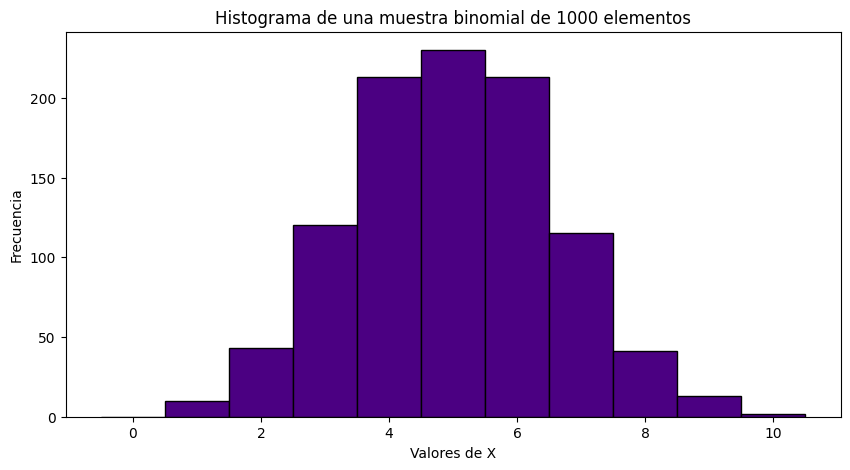

In [43]:
Z = Binomial(10, 0.5)
Z.graficar()

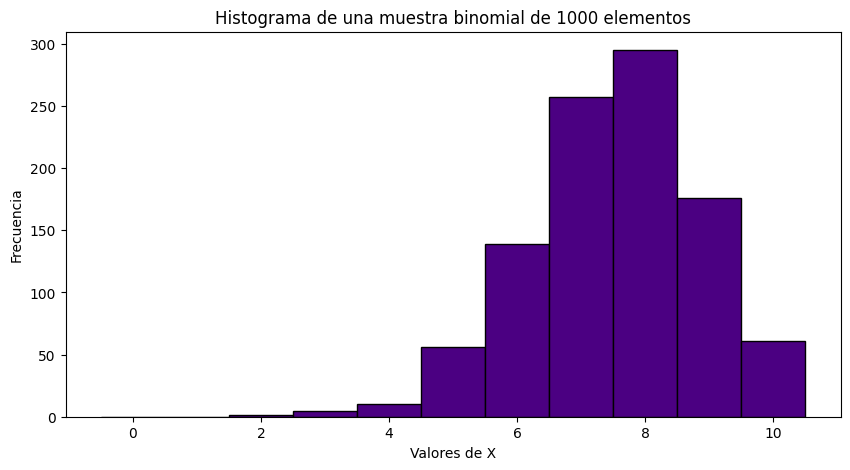

In [44]:
W = Binomial(10, 0.75)
W.graficar()

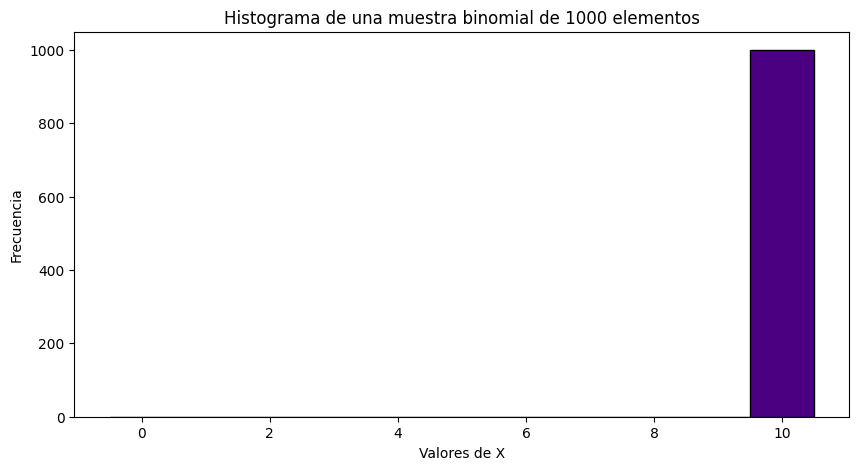

In [45]:
D = Binomial(10, 1)
D.graficar()